In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp
from sklearn.model_selection import train_test_split
from collections import Counter

# Load All Data, Concatenate Them together
- Ratio - Train : Validation : Test = 70 : 15 : 15
- Keep original dataset size : No oversampling for Chirp signal - Sinusoidal : Chirp = 6.63 : 1
- This is expected to be trained favoring sinusoidal, but let's still try

In [15]:
dir = '/Volumes/KleeFD/dataset/window_normalized/Window Size/one thirds/'

# Load Train Data - Sinusoidal
train_X1 = np.load(dir + 'train_X.npy')
train_Y1 = (np.load(dir + 'train_Y.npy')).reshape(-1,2)

# Load Val Data - Sinusoidal
val_X1 = np.load(dir + 'val_X.npy')
val_Y1 = (np.load(dir + 'val_Y.npy')).reshape(-1,2)

# Check stratification
boa = train_Y1[:,0]
freq = train_Y1[:,1]

print(Counter(boa), Counter(freq))

Counter({30.0: 5628, 25.0: 2228}) Counter({0.5: 982, 0.2: 982, 0.35: 982, 0.25: 982, 0.3: 982, 0.1: 982, 0.4: 982, 0.05: 982})


In [31]:
# Load Data - Chirp
dir = '/Volumes/KleeFD/dataset/dataset_chirp/02_boa25+30_f0p05f0p5/'
train_X2 = np.load(dir + 'train_X.npy')
train_Y2 = (np.load(dir + 'train_Y.npy')).reshape(-1,2)

# Split Chirp dataset into train : validation = 70 : 15
train_X2, val_X2, train_Y2, val_Y2 = \
    train_test_split(train_X2, train_Y2, test_size=0.1765,random_state=0, shuffle=True, stratify=train_Y2)

# Check stratification
boa = train_Y2[:,0]
freq = train_Y2[:,1]

print("training :", Counter(boa), Counter(freq))
print('validation :', Counter(val_Y2[:,0]), Counter(val_Y2[:, 1]))

training : Counter({30.0: 592, 25.0: 592}) Counter({0.2: 198, 0.1: 198, 0.4: 196, 0.3: 132, 0.35: 132, 0.25: 132, 0.5: 130, 0.05: 66})
validation : Counter({25.0: 127, 30.0: 127}) Counter({0.4: 44, 0.1: 42, 0.2: 42, 0.25: 28, 0.3: 28, 0.35: 28, 0.5: 28, 0.05: 14})


In [32]:
np.mean(train_X2)

-9.056076731006653e-06

In [33]:
np.mean(train_X1)

1.2003867011048573e-16

array(['25.0', '0.25', 'chirp'], dtype='<U32')

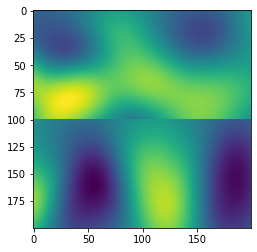

In [26]:
plt.imshow(val_X2[0])
val_Y2[0]

In [17]:
# Add type flag - sin = 0, chirp = 1
sin = np.full((len(train_Y1), 1), 'sin')
chirp = np.full((len(train_Y2), 1), 'chirp')

train_Y1 = np.concatenate((train_Y1, sin), axis = 1)
train_Y2 = np.concatenate((train_Y2, chirp), axis = 1)


sin = np.full((len(val_Y1), 1), 'sin')
chirp = np.full((len(val_Y2), 1), 'chirp')

val_Y1 = np.concatenate((val_Y1, sin), axis = 1)
val_Y2 = np.concatenate((val_Y2, chirp), axis = 1)

In [18]:
train_X = np.concatenate((train_X1, train_X2), axis = 0)
train_Y = np.concatenate((train_Y1, train_Y2), axis = 0)

val_X = np.concatenate((val_X1, val_X2), axis = 0)
val_Y = np.concatenate((val_Y1, val_Y2), axis = 0)

In [19]:
train_Y[0:10]

array([['30.0', '0.5', 'sin'],
       ['25.0', '0.2', 'sin'],
       ['25.0', '0.2', 'sin'],
       ['30.0', '0.35', 'sin'],
       ['30.0', '0.25', 'sin'],
       ['25.0', '0.25', 'sin'],
       ['25.0', '0.3', 'sin'],
       ['30.0', '0.1', 'sin'],
       ['30.0', '0.25', 'sin'],
       ['30.0', '0.2', 'sin']], dtype='<U32')

In [20]:
s = np.arange(val_X.shape[0])
np.random.shuffle(s)

val_X = val_X[s]
val_Y = val_Y[s]

s = np.arange(train_X.shape[0])
np.random.shuffle(s)

train_X = train_X[s]
train_Y = train_Y[s]

In [21]:
train_Y[0:10]

array([['30.0', '0.3', 'sin'],
       ['30.0', '0.4', 'sin'],
       ['30.0', '0.05', 'sin'],
       ['30.0', '0.25', 'sin'],
       ['30.0', '0.3', 'sin'],
       ['30.0', '0.3', 'sin'],
       ['30.0', '0.2', 'sin'],
       ['30.0', '0.25', 'sin'],
       ['30.0', '0.4', 'sin'],
       ['30.0', '0.3', 'chirp']], dtype='<U32')

In [22]:
d = '/Volumes/KleeFD/dataset/dataset_chirp/03_sinusoidal + chirp/'

In [23]:
np.save(d+'train_X.npy', train_X)
np.save(d+'train_Y.npy', train_Y)

np.save(d+'val_X.npy', val_X)
np.save(d+'val_Y.npy', val_Y)